In [1]:
import os
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
p = '../reference/1.2.826.0.1.3680043.10001_1_0.npy' # load sample of segmented result
np.load(p).shape

(224, 224, 6)

In [2]:
path = '../../data/segmentations/s_128'
image_path = os.path.join(path, 'image')
mask_path = os.path.join(path, 'mask')

image_files = sorted(glob.glob(image_path + '/*'))
mask_files = sorted(glob.glob(mask_path + '/*'))
len(image_files), len(mask_files)

(206, 206)

In [110]:
i = 150
image = image_files[i]
mask = mask_files[i]
assert image.split('/')[-1] == mask.split('/')[-1]
image = np.load(image)
mask = np.load(mask)
image.shape, mask.shape

((128, 128, 3, 128), (5, 128, 128, 128))

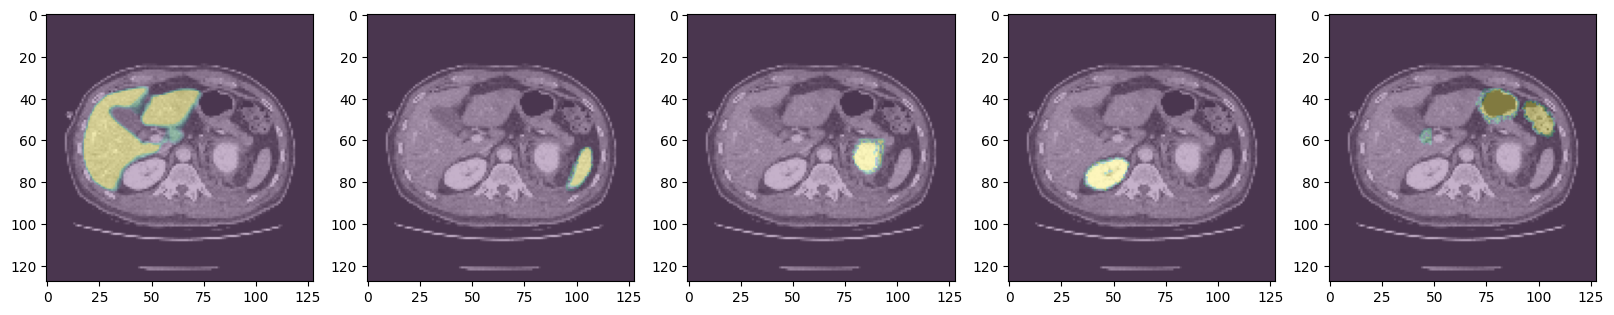

In [111]:
# check direction and rotation 
j = 100

sample = image[:,:,:,j]

fig, axes = plt.subplots(1,5,figsize=(20,4))
for k in range(5):
    axes[k].imshow(sample, alpha=0.7)
    axes[k].imshow(mask[k,:,:,j] * (k+1), alpha=0.3)

In [209]:
image_sizes = [128, 128, 128]
from monai import transforms

transforms_train = transforms.Compose([
    transforms.RandFlipd(keys=["image", "mask"], prob=0.5, spatial_axis=0), # 1
    transforms.RandFlipd(keys=["image", "mask"], prob=0.5, spatial_axis=1), # 2
    # transforms.RandAffined(
    #     keys=["image", "mask"], 
    #     translate_range=[int(x*y) for x, y in zip(image_sizes, [0.3, 0.3, 0.3])], 
    #     padding_mode='zeros', 
    #     prob=0.7
    # ),
    transforms.RandGridDistortiond(
        keys=("image", "mask"), prob=0.5, distort_limit=(-0.01, 0.01), mode="nearest"),    
])
transforms_valid = transforms.Compose([])

In [157]:
image.shape, mask.shape

((128, 128, 3, 128), (5, 128, 128, 128))

In [212]:
res = transforms_train({'image':image, 'mask':mask})
image2 = res['image'] / 255.
mask2 = res['mask']
mask2 = (mask2 > 127).astype(np.float32)
image2.shape, mask2.shape

((128, 128, 3, 128), (5, 128, 128, 128))

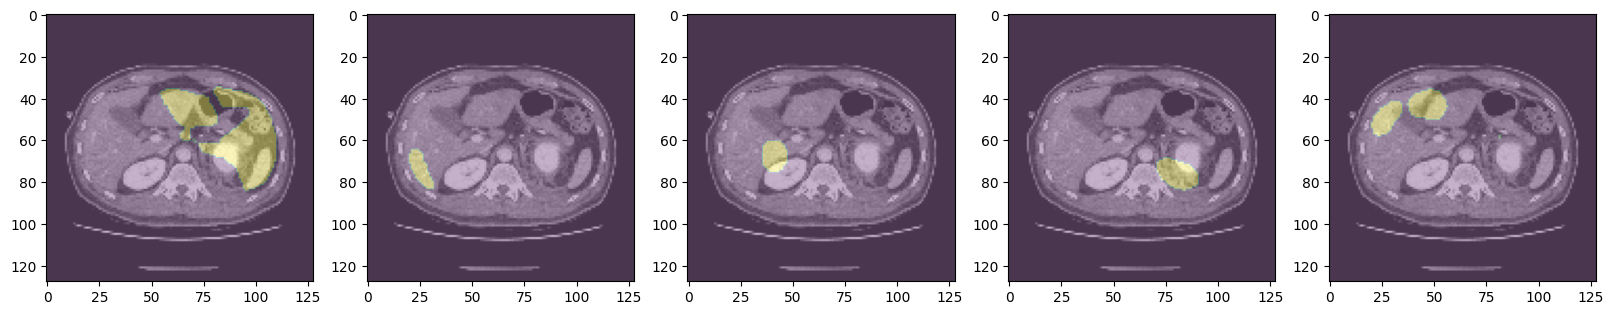

In [213]:
# check direction and rotation by code
sample2 = image2[:,:,:,j]

fig, axes = plt.subplots(1,5,figsize=(20,4))
for k in range(5):
    axes[k].imshow(sample2, alpha=0.7)
    axes[k].imshow(mask2[k,:,:,j] * (k+1), alpha=0.3)

In [77]:
mask2.shape

(5, 128, 128, 128)

In [170]:
image.shape

(128, 128, 3, 128)

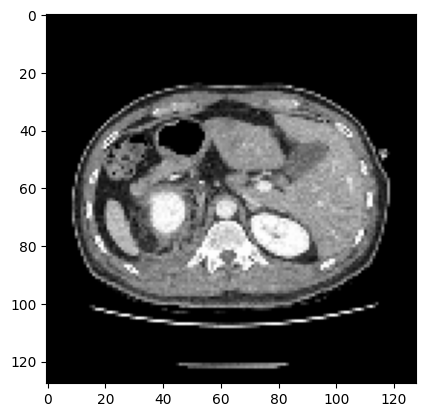

In [186]:
transforms_test = transforms.Compose([
    transforms.RandFlipd(keys=["image"], prob=1.0, spatial_axis=0), # 2
])
record = transforms_test({'image':image})
image3 = record['image']
plt.imshow(image3[:,:,:,j])

In [198]:
image.shape

(128, 128, 3, 128)

In [218]:
tmp = image.transpose(2,0,1,3)
print(tmp.shape)

temp = transforms_train({'image':tmp, 'mask':mask})
image3 = temp['image'] / 255.
mask3 = temp['mask']
mask3 = (mask3 > 127).astype(np.float32)

image3 = image3.permute(1,2,0,3)
image3.shape, mask3.shape, image3.dtype, mask3.dtype

(3, 128, 128, 128)


((128, 128, 3, 128), (5, 128, 128, 128), torch.float32, dtype('float32'))

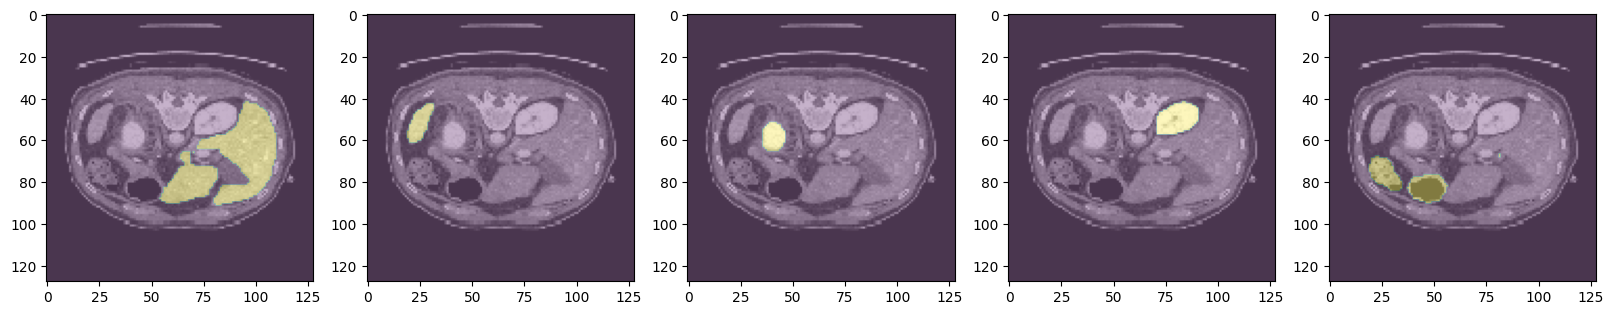

In [219]:
sample3 = image3[:,:,:,j]

fig, axes = plt.subplots(1,5,figsize=(20,4))
for k in range(5):
    axes[k].imshow(sample3, alpha=0.7)
    axes[k].imshow(mask3[k,:,:,j] * (k+1), alpha=0.3)

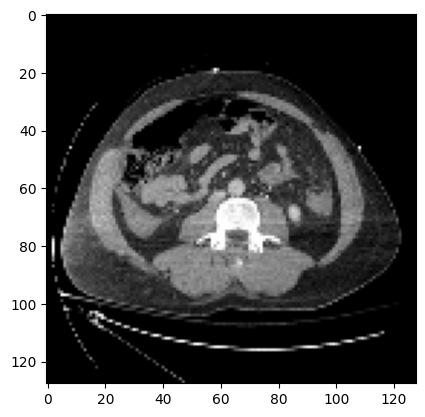

In [223]:
t = '../../data/segmentations/s_128/image'
t = np.load(t + '/10300_31085.npy')
plt.imshow(t[:,:,:,60])